In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [3]:
df = pd.read_csv('loan_data_Finale.csv')

In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.shape

(45000, 14)

In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

## **1. Visualizing our data :**

C:\Users\dell\AppData\Local\Temp\ipykernel_22932\3400465503.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_age'])


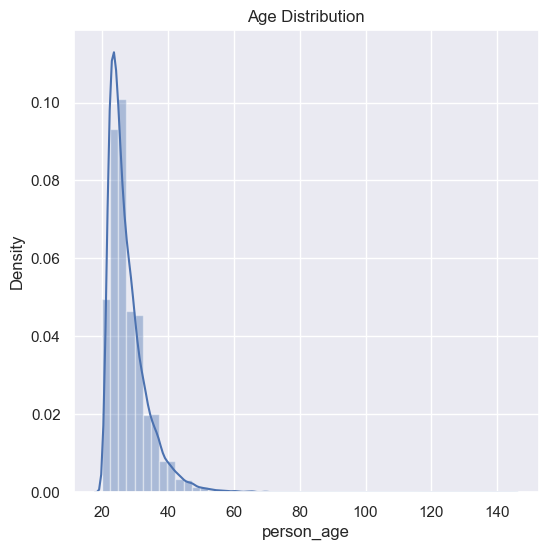

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['person_age'])
plt.title('Age Distribution')
plt.show()

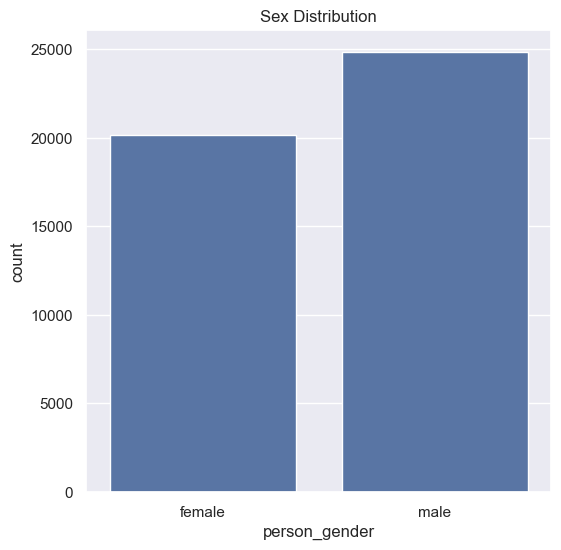

In [9]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='person_gender', data=df)
plt.title('Sex Distribution')
plt.show()

In [10]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## **2. Encoding the categoricale data attributes**

In [11]:
# encoding gender column
df.replace({'person_gender':{'male':1,'female':0}}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_22932\1072565611.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'person_gender':{'male':1,'female':0}}, inplace=True)


In [12]:
df['person_gender'].value_counts()

person_gender
1    24841
0    20159
Name: count, dtype: int64

In [13]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [14]:
# encoding education column
df.replace({'person_education':{'Bachelor':0,'Associate':1,'High School':2,'Master':3,'Doctorate':4}}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_22932\595248982.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'person_education':{'Bachelor':0,'Associate':1,'High School':2,'Master':3,'Doctorate':4}}, inplace=True)


In [15]:
df['person_education'].value_counts()

person_education
0    13399
1    12028
2    11972
3     6980
4      621
Name: count, dtype: int64

In [16]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [17]:
#encoding home ownership
df.replace({'person_home_ownership':{'OTHER':3 ,'OWN':2 , 'MORTGAGE':1 , 'RENT':0}},inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_22932\1539376245.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'person_home_ownership':{'OTHER':3 ,'OWN':2 , 'MORTGAGE':1 , 'RENT':0}},inplace=True)


In [18]:
df['person_home_ownership'].value_counts()

person_home_ownership
0    23443
1    18489
2     2951
3      117
Name: count, dtype: int64

In [19]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [20]:
#encoding loan intent
df.replace({'loan_intent':{'EDUCATION':0,'MEDICAL':1,'VENTURE':2,'PERSONAL':3,'DEBTCONSOLIDATION':4 , 'HOMEIMPROVEMENT':5}}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_22932\2095518901.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'loan_intent':{'EDUCATION':0,'MEDICAL':1,'VENTURE':2,'PERSONAL':3,'DEBTCONSOLIDATION':4 , 'HOMEIMPROVEMENT':5}}, inplace=True)


In [21]:
df['loan_intent'].value_counts()

loan_intent
0    9153
1    8548
2    7819
3    7552
4    7145
5    4783
Name: count, dtype: int64

In [22]:
# encoding gender column
df.replace({'previous_loan_defaults_on_file':{'Yes':1,'No':0}}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_22932\3692998468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'previous_loan_defaults_on_file':{'Yes':1,'No':0}}, inplace=True)


In [23]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64

In [24]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,0,35000.0,3,16.02,0.49,3.0,561,0,1
1,21.0,0,2,12282.0,0,2,1000.0,0,11.14,0.08,2.0,504,1,0
2,25.0,0,2,12438.0,3,1,5500.0,1,12.87,0.44,3.0,635,0,1
3,23.0,0,0,79753.0,0,0,35000.0,1,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,0,35000.0,1,14.27,0.53,4.0,586,0,1


## **3. Training the Model**

In [25]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the top K features (you can adjust K as needed)
selector = SelectKBest(chi2, k=5)  # Select top 5 features
X_new = selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate',
       'previous_loan_defaults_on_file'],
      dtype='object')


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6990
           1       0.77      0.73      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000

Accuracy: 0.8911111111111111


In [31]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

ROC-AUC: 0.9505510359504339


In [32]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.3722375248222405


In [40]:
# Sample test data (matching the columns of your original dataset)
test_data = {
    'person_age': [20.0],
    'person_gender': [0],  # 1: Male, 0: Female
    'person_education': [2],  # 0: High School, 1: Bachelor, 2: Master, 3: PhD
    'person_income': [55000.0],
    'person_emp_exp': [5],  # Years of employment experience
    'person_home_ownership': [1],  # 0: Rent, 1: Own, 2: Mortgage
    'loan_amnt': [200000.0],
    'loan_intent': [2],  # 0: Personal, 1: Credit Card, 2: Debt Consolidation, 3: Other
    'loan_int_rate': [12.5],
    'loan_percent_income': [0.35],
    'cb_person_cred_hist_length': [4],  # Credit history length in years
    'credit_score': [650],
    'previous_loan_defaults_on_file': [0]  # 0: No, 1: Yes
}

test_input = pd.DataFrame(test_data)

# Apply the same scaler transformation to the test data
test_input_scaled = scaler.transform(test_input)

# Assuming 'model3' is your trained model
predicted_label = model.predict(test_input_scaled)

# Print the predicted label
print("Predicted Loan Status:", "Approved" if predicted_label[0] == 1 else "Not Approved")

# predicted_label = model.predict(test_input)
# print("Predicted Loan Status:", "Approved" if predicted_label[0] == 1 else "Not Approved")


Predicted Loan Status: Not Approved


In [34]:
import pickle 

In [43]:
pickle.dump(model , open('Loan_Prediction_Finale_Model.pkl' , 'wb'))
pickle.dump(scaler , open('Scaler.pkl' , 'wb'))

In [44]:
pickled_model = pickle.load(open('Loan_Prediction_Finale_Model.pkl' , 'rb'))
pickle_scaler = pickle.load(open('Scaler.pkl', 'rb'))

In [45]:
test_input_scaled_pickle = pickle_scaler.transform(test_input)
pickled_model.predict(test_input_scaled_pickle)
# Print the predicted label
print("Predicted Loan Status:", "Approved" if predicted_label[0] == 1 else "Not Approved")

Predicted Loan Status: Not Approved
